
# **Bank Transaction Dataset**



# **Overview:**
 This dataset contains detailed records of bank transactions, including transaction narrations, amounts, and dates. While it doesn’t provide pre-defined relationships between accounts, it allows for the construction of a transaction network by connecting accounts based on shared attributes such as transaction narrations or amounts.

# **Key Features:**
**1. Transaction Narrations:** Descriptions of transactions, useful for identifying common entities or purposes.
** 2. Transaction Amounts:** Monetary values for analyzing transaction volumes and patterns.
**3. Dates:** Transaction timestamps, enabling temporal analysis of account activities.

 **Potential Graph Construction:**
- **Nodes:** Bank accounts (or customer IDs)
- **Edges:** Transactions between accounts, established by matching transaction narrations, amounts, or sequential flows within the same account.

# **Applications:**
 - Detecting frequent transaction patterns or loops in financial networks.
- Analyzing customer behavior over time.
 - Identifying anomalous or potentially fraudulent transactions using BFS and DFS.



# Load Dataset & Import Libraries

In [27]:
import pandas as pd
from collections import deque

In [28]:
file_path = 'bank.xlsx'
df = pd.read_excel(file_path)

# Select relevant columns and clean data

In [29]:
df = df[['Account No', 'DATE', 'TRANSACTION DETAILS', 'WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT']]
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.sort_values(by=['Account No', 'DATE'], inplace=True)

# Build a transaction graph

In [30]:
graph = {}
for acc, group in df.groupby('Account No'):
    transactions = list(group['TRANSACTION DETAILS'])
    for i in range(len(transactions) - 1):
        src = transactions[i]
        dest = transactions[i + 1]
        if src not in graph:
            graph[src] = []
        graph[src].append(dest)
    if transactions[-1] not in graph:
        graph[transactions[-1]] = []

In [31]:
print("=== Transaction Graph (Adjacency List) ===")
for node, neighbors in graph.items():
    print(f"{node} -> {neighbors}")


=== Transaction Graph (Adjacency List) ===
DSB CASH PICKP IndiaforensicMET0 -> ['BEAT CASH PICKP DELH 3925', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP IndiaforensicGUR0', 'DSB CASH PICKP Indiaforens

#  Implement BFS

In [32]:
def bfs(graph, start_node):
    visited = set()
    queue = deque([start_node])
    visited.add(start_node)
    bfs_order = []

    while queue:
        node = queue.popleft()
        bfs_order.append(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    return bfs_order

# Implement DFS

In [33]:
def dfs(graph, start_node):
    visited = set()
    stack = [start_node]
    dfs_order = []

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            dfs_order.append(node)
            for neighbor in reversed(graph[node]):  # reversed for consistent order
                if neighbor not in visited:
                    stack.append(neighbor)
    return dfs_order


#  Run Traversals

In [34]:
start_transaction = list(graph.keys())[0]

In [35]:
bfs_result = bfs(graph, start_transaction)
dfs_result = dfs(graph, start_transaction)

In [36]:
print(f"\n=== BFS Traversal Starting from '{start_transaction}' ===")
print(" -> ".join(map(str, bfs_result)))


=== BFS Traversal Starting from 'DSB CASH PICKP IndiaforensicMET0' ===
DSB CASH PICKP IndiaforensicMET0 -> BEAT CASH PICKP DELH 3925 -> DSB CASH PICKP IndiaforensicGUR0 -> CHQ DEP/45811/OWDEL1/BARB -> FUND TRF TO  Indiaforensic SERVI -> BEAT CASH PICKP DELH 3796 -> RTGS CHARGES AND STAX/RAT -> RTGS/YESBH15007783094/Indfor -> FUND TRF  TO  Indiaforensic SERV -> REVRSL MUTILTD IndiaforensicMET0 -> CASHDEP/BORIVALI/ -> DSB MUTILTD IndiaforensicMET2802 -> CASHDEP/NEW-DELHI/ -> CASHDEP/VAPI/ -> CASHDEP/NOIDA/TP -> RTGS/YESBH15100449666/Indfor -> IB: OFT TO XX0071 Indiaforensic -> CASHDEP/BHI-RIICO/ -> RTGS/YESBH15128648839/Indfor -> CASHDEP/NOIDA/TP/RECHARGE -> CHQ DEP/730174/OWDEL1/SBT -> CASHDEP/DAMAN/ -> CASHDEP/RAJOURI/ -> CHQ DEP/237843/OWDEL1/SBI -> DSB MUTI CSH Indfor METRO030 -> RTGS/YESBH15033969644/Indfor -> CHQ DEP/560816/OWDEL1/PUN -> CHQ DEP/111221/OWDEL1/SBI -> CASHDEP/RMALL/ -> CASHDEP/GURGAON/ -> NEFT/BKIDN15358584606/RAI -> CASHDEP/CHANDNICHK/ -> FUND TRF TO  Indiaforensic

In [37]:
print(f"\n=== DFS Traversal Starting from '{start_transaction}' ===")
print(" -> ".join(map(str, dfs_result)))


=== DFS Traversal Starting from 'DSB CASH PICKP IndiaforensicMET0' ===
DSB CASH PICKP IndiaforensicMET0 -> BEAT CASH PICKP DELH 3925 -> CHQ DEP/45811/OWDEL1/BARB -> CHQ DEP/237843/OWDEL1/SBI -> CHQ DEP/252242/OWDEL1/SBI -> CHQ DEP/252243/OWDEL1/SBI -> RTGS CHARGES AND STAX/RAT -> RTGS/YESBH15002745737/Indfor -> RTGS/YESBH15006775107/Indfor -> BEAT CASH PICKP DELH 3796 -> FUND TRF TO  Indiaforensic SERVI -> DSB MUTI CSH Indfor METRO030 -> CASHDEP/RAJOURI/ -> RTGS/YESBH15016858023/Indfor -> CASHDEP/NOIDA/@NOIDA -> CHQ DEP/68159/OWDEL1/SBIN -> CHQ DEP/52896/OWDEL1/IDIB -> CHQ DEP/9862/OWDEL1/SBIN/ -> CHQ DEP/68158/OWDEL1/SBIN -> RTGS/YESBH15015848536/Indfor -> CASHDEP/NALASOPARA/900200 -> DSB CASH PICKP IndiaforensicMET1 -> DSB CASH PICKP IndiaforensicGUR1 -> BEAT CASH PICKP DELH 2911 -> RTGS/YESBH15042036735/Indfor -> CASHDEP/NEW-DELHI/ -> REVRSL MUTILTD IndiaforensicMET0 -> DSB MUTILTD IndiaforensicMET0302 -> DSB CSH PCKUP METRO170220 -> DSB CSH PCKUP GUR 1702201 -> DSB CASH PICKP Indi

# Take only first 50 nodes for visualization

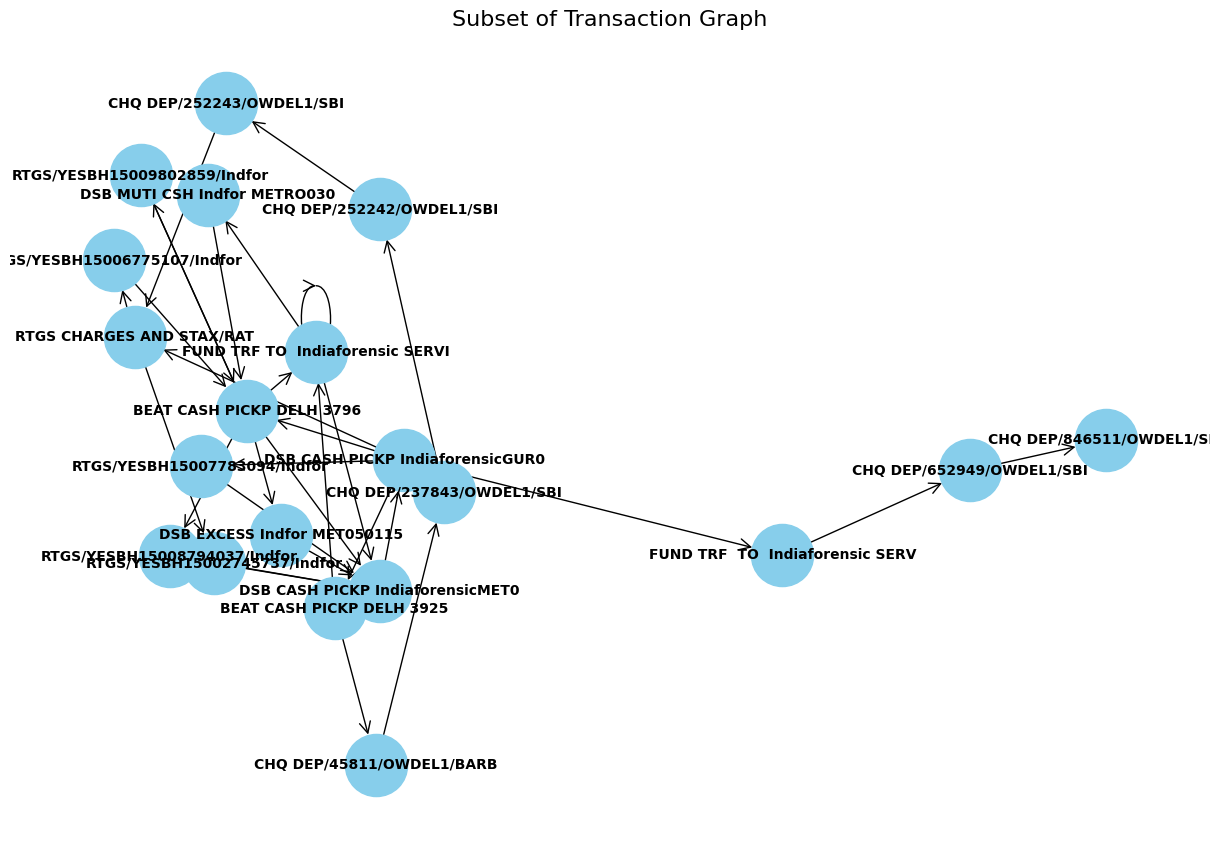

In [39]:

subset_nodes = list(graph.keys())[:20]
G_subset = nx.DiGraph()
for src in subset_nodes:
    for dest in graph[src]:
        if dest in subset_nodes:
            G_subset.add_edge(str(src), str(dest))

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_subset, seed=42)
nx.draw(G_subset, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold', arrowstyle='->', arrowsize=20)
plt.title("Subset of Transaction Graph", fontsize=16)
plt.show()
